In [1]:
import pydicom
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import numpy as np
# ipywidgets for some interactive plots
from ipywidgets.widgets import * 
import ipywidgets as widgets
# plotly 3D interactive graphs 
import plotly
from plotly.graph_objs import *
import chart_studio.plotly as py
# For contouring
import math
#from tqdm.notebook import tqdm
from scipy.sparse import csc_matrix
import scipy.ndimage as scn
###################
from PIL import Image
from matplotlib.colors import Normalize
from matplotlib import cm
import pandas as pd


# Portal Dosimetry Image Extraction

In [2]:
l = sorted([f.path for f in os.scandir('dataset/prostate_2G') if f.is_dir()])               #list_subfolders_with_paths
z = [os.listdir(l[i]) for i in range(len(l))]                                           #list of indexed sub-folders
zz = [[file for file in z[i] if file.endswith(".dcm")] for i in range(len(z))]          #to avoid last elemnet -> {.listing} 
a = [[pydicom.dcmread(l[i]+'/'+zz[i][j]) for j in range(len(zz[i]))] for i in range(len(zz))]

In [3]:
idy= [a[i][0].PatientID if a[i][0].PatientID == a[i][1].PatientID else a[i][1].PatientID for i in range(len(a))]
idy = pd.DataFrame(idy)
idy.to_csv('id_2G.csv', index= False )     #--->>>> Edit the cvs file to run the next cell

In [89]:
true_id = pd.read_csv('gamma.csv')
portal_id = pd.read_csv('id.csv')

In [18]:
#check = [i if true_id['id'][i] == portal_id['id'][i] else true_id['id'][i] for i in range(len(portal_id['id']))]
#check

In [ ]:
# To extract all portal dosimetry files with the same size we create
# a list of all fdirectories and a list with all subdirectories

l = sorted([f.path for f in os.scandir('dataset/prostate_2Gy_2ARCS/') if f.is_dir()])               #list_subfolders_with_paths
z = [os.listdir(l[i]) for i in range(len(l))]                                           #list of indexed sub-folders
zz = [[file for file in z[i] if file.endswith(".dcm")] for i in range(len(z))]          #to avoid last elemnet -> {.listing} 
a = [[pydicom.dcmread(l[i]+'/'+zz[i][j]) for j in range(len(zz[i]))] for i in range(len(zz))]
i1 = np.array([a[i][0].pixel_array if a[i][0].GantryAngle >= 181 else a[i][1].pixel_array for i in range(len(a))]) 
i1 = np.array([i1[i][:512, :512]  for i in range(len(a))])
i2 = np.array([a[i][0].pixel_array if a[i][0].GantryAngle <= 179 else a[i][1].pixel_array for i in range(len(a))])
i2 = np.array([i2[i][:512, :512] for i in range(len(a))])
i = np.concatenate((i1,i2), axis=0)
i = np.array([(i[j]/i[j].max()) for j in range(len(i))])                                # Final Normalized dataset with shape (40, 571, 571)

In [90]:
l = sorted([f.path for f in os.scandir('dataset/prostate_3G') if f.is_dir()])               #list_subfolders_with_paths
z = [os.listdir(l[i]) for i in range(len(l))]                                           #list of indexed sub-folders
zz = [[file for file in z[i] if file.startswith("RI")] for i in range(len(z))]          #to avoid last elemnet -> {.listing} 
a = [[pydicom.dcmread(l[i]+'/'+zz[i][j]) for j in range(len(zz[i]))] for i in range(len(zz))]
#i = np.array([a[i][0].pixel_array for i in range(len(a))]) 

In [33]:
#[i[j].shape for j in range(len(i))]

In [5]:
#-------TB--------------
l = sorted([f.path for f in os.scandir('dataset/prostate_2G') if f.is_dir()])               #list_subfolders_with_paths
z = [os.listdir(l[i]) for i in range(len(l))]                                           #list of indexed sub-folders
zz = [[file for file in z[i] if file.startswith("RI")] for i in range(len(z))]          #to avoid last elemnet -> {.listing} 
a = [[pydicom.dcmread(l[i]+'/'+zz[i][j]) for j in range(len(zz[i]))] for i in range(len(zz))]
i = np.array([a[i][0].pixel_array for i in range(len(a))]) 
#i = np.array([i[i][:512, :512]  for i in range(len(a))]). ##-->> to have the same size
#i2 = np.array([a[i][0].pixel_array if a[i][0].GantryAngle <= 179 else a[i][1].pixel_array for i in range(len(a))])
#i2 = np.array([i2[i][:512, :512] for i in range(len(a))])
#i = np.concatenate((i1,i2), axis=0)
i = np.array([(i[j]/i[j].max()) for j in range(len(i))])                                

dataset shape (132, 384, 512)


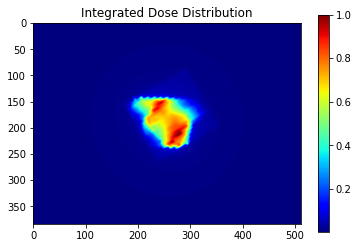

In [6]:
print('dataset shape', i.shape)
plt.imshow(i[14], cmap='jet')
plt.title('Integrated Dose Distribution')
plt.colorbar();

In [7]:
from ipywidgets.widgets import * 
import ipywidgets as widgets

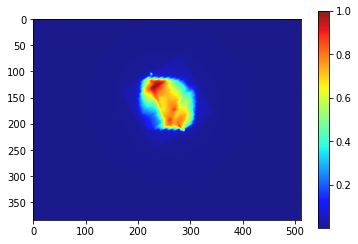

65

<function __main__.dicom_animation(x)>

In [8]:
def dicom_animation(x):
    plt.imshow(i[x], cmap='jet', alpha=0.9)
    plt.colorbar()
    

    return x

interact(dicom_animation, x=(0, len(i)-1))

In [5]:
np.save('portal_2G_1arc.npy', i)

# CT, RP_ltm, RP_MUcp, RS, RD

In [9]:
l = sorted([f.path for f in os.scandir('dataset/HL_3Gy_1ARC/dicom') if f.is_dir()])                    #list_subfolders_with_paths
z = [os.listdir(l[i]) for i in range(len(l))]                                               #list of indexed sub-folders
#zz = [[file for file in z[i] if file.endswith(".dcm")] for i in range(len(z))]             #
ct = [[file for file in z[i] if file.startswith("CT")] for i in range(len(z))]              # list of ct images
rs = [[file for file in z[i] if file.startswith("RS")] for i in range(len(z))]              # list of rt-structure
rp = [[file for file in z[i] if file.startswith("RP")] for i in range(len(z))]              # list of rt-plan    
rd = [[file for file in z[i] if file.startswith("RD")] for i in range(len(z))]              # list of rt-dose

## CT

In [10]:
ct1 = [[pydicom.dcmread(l[j]+'/'+ct[j][i]) for i in range (len(ct[j]))] for j in range(len(l))]                 # retrieve the files directories 
ct1 = [sorted(ct1[j], key=lambda s: s.SliceLocation) for j in range(len(ct1))]                                  # sorted the images by the slice location
ct11 = np.array([np.array([ct1[j][i].pixel_array for i in range (len(ct1[j]))]) for j in range(len(ct1))])      # extract the pixel array of ct images
ct11 = np.array([ct11[j][:88] for j in range(len(ct11))])                                                       # take the first 89 slices 
cti = np.array([[ct11[j][i]/(ct11[j][i].max()) for i in range(len(ct11[j]))] for j in range(len(ct11))])         # normalize the data, final CT shape (x, 88,512,512)

In [6]:
#np.save('ct1.npy', cti)

In [3]:
#([ct11[i].shape if ct11[i].shape == (89, 512, 512) else i for i in range(len(ct11))])              # To verify the size af all CTs

dataset shape (116, 88, 512, 512)


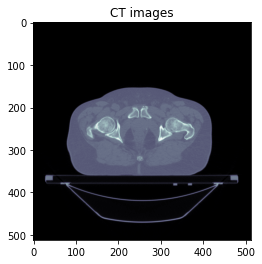

In [4]:
print('dataset shape', cti.shape)
plt.imshow(cti[0][35], cmap=plt.cm.bone)
plt.title('CT images');

In [ ]:
def dicom_animation(x):
    plt.imshow(cti[0][x], cmap=plt.cm.bone, alpha=0.9)
    plt.colorbar()
    

    return x

interact(dicom_animation, x=(0, len(cti[0])-1))

## The second half

In [ ]:
l = sorted([f.path for f in os.scandir('dataset/untitled folder/') if f.is_dir()]) 
z = [os.listdir(l[i]) for i in range(len(l))] 
ct = [[file for file in z[i] if file.startswith("CT")] for i in range(len(z))]                                                            

In [3]:
ct1 = [[pydicom.dcmread(l[j]+'/'+ct[j][i]) for i in range (len(ct[j]))] for j in range(len(l))]                 # retrieve the files directories 
ct1 = [sorted(ct1[j], key=lambda s: s.SliceLocation) for j in range(len(ct1))]                                  # sorted the images by the slice location
ct11 = np.array([np.array([ct1[j][i].pixel_array for i in range (len(ct1[j]))]) for j in range(len(ct1))])      # extract the pixel array of ct images
ct11 = np.array([ct11[j][:88] for j in range(len(ct11))])                                                       # take the first 89 slices 
ct2 = np.array([[ct11[j][i]/(ct11[j][i].max()) for i in range(len(ct11[j]))] for j in range(len(ct11))])         # normalize the data, final CT shape (x, 88,512,512)

<ipython-input-3-0bcbea1fbd01>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ct11 = np.array([np.array([ct1[j][i].pixel_array for i in range (len(ct1[j]))]) for j in range(len(ct1))])      # extract the pixel array of ct images


In [5]:
#np.save('ct2.npy', ct2)

In [2]:
i1 = np.load('ct1.npy')
i2 = np.load('ct2.npy')

In [3]:
print('ct1_shape', i1.shape)
print('ct2_shape', i2.shape)

ct1_shape (119, 88, 512, 512)
ct2_shape (116, 88, 512, 512)


In [4]:
i = np.concatenate((i1,i2), axis=0)

In [ ]:
i.shape

In [ ]:
np.save('ct.npy', i)

## RP --> Leaf Trajectory Map

In [6]:
l = sorted([f.path for f in os.scandir('dataset/prostate_2G') if f.is_dir()])                    #list_subfolders_with_paths
z = [os.listdir(l[i]) for i in range(len(l))]
rp = [[file for file in z[i] if file.startswith("RP")] for i in range(len(z))]              # list of rt-plan 

In [7]:
rp1 = [pydicom.dcmread(l[i]+'/'+rp[i][0]) for i in range(len(l))]  

In [138]:
id_tlm = [rp1[i].PatientID for i in range(len(rp1))]
id_tlm = pd.DataFrame(id_tlm, columns=['id'])
true_id = pd.read_csv('gamma.csv')

In [139]:
#check = [i if true_id['id'][i] == id_tlm['id'][i] else id_tlm['id'][i] for i in range(len(id_tlm['id']))]
#check

In [9]:
#----TB
B =[]
B2=[]
N= 178  # number of control points
 #number of active leaves
for i in range(len(rp1)):
    #ds = pydicom.dcmread(l[i]+'/'+ rp1[i])
    d_1 = rp1[i].BeamSequence[0]
    
    #if len(ds1[0].ControlPointSequence)>= 10:
    #    d_1 = rp1[i].BeamSequence[0]
    #else:
    #    d_1 = rp1[i].BeamSequence[1]
    
    ww_1= []
    for m in range(1, len(d_1.ControlPointSequence)):
        cp_1 = d_1.ControlPointSequence[m]
        cc_1 = cp_1.BeamLimitingDevicePositionSequence[0]
        vv_1 = cc_1.LeafJawPositions
        ww_1.append(vv_1)
    LM_1 = np.array(ww_1)
    B.append(LM_1)
cc2 = np.array(B)

In [10]:
cc2.shape

(132, 177, 120)

In [156]:
bc = np.concatenate((cc,cc2), axis=0) 

In [157]:
bc.shape

(22, 177, 56)

In [12]:
np.save('tlm_2Gy_1arc.npy', cc2)

In [68]:
#-----HALCYON------
rp11 = []
rp12 = []
for i in range(len(rp1)):  
    b1 = rp1[i].BeamSequence[0].ControlPointSequence  
#    if len(rp1[i].BeamSequence[0].ControlPointSequence) == 178 and rp1[0].BeamSequence[0].ControlPointSequence[0].GantryRotationDirection == 'CW':
#        b1 = rp1[i].BeamSequence[0].ControlPointSequence
#        b2 = rp1[i].BeamSequence[1].ControlPointSequence
#    elif len(rp1[i].BeamSequence[0].ControlPointSequence) == 178 and rp1[0].BeamSequence[0].ControlPointSequence[0].GantryRotationDirection == 'CC':
#        b1 = rp1[i].BeamSequence[1].ControlPointSequence
#        b2 = rp1[i].BeamSequence[0].ControlPointSequence
#    elif len(rp1[i].BeamSequence[0].ControlPointSequence) == 2 and rp1[0].BeamSequence[1].ControlPointSequence[0].GantryRotationDirection == 'CW':
#        b1 = rp1[i].BeamSequence[1].ControlPointSequence
#        b2 = rp1[i].BeamSequence[2].ControlPointSequence
#    elif len(rp1[i].BeamSequence[0].ControlPointSequence) == 2 and rp1[0].BeamSequence[1].ControlPointSequence[0].GantryRotationDirection == 'CC':
#        b1 = rp1[i].BeamSequence[2].ControlPointSequence
#        b2 = rp1[i].BeamSequence[1].ControlPointSequence
    rp11.append(b1)
#    rp12.append(b2)

In [69]:
# Beam 1
rp111 = [np.array([rp11[j][i].BeamLimitingDevicePositionSequence[0].LeafJawPositions for i in range(1,len(rp11[j]))]).T for j in range(len(rp11))]      # extract the leaf position of Upper MLC (58 leafs)
rp112 = [np.array([rp11[j][i].BeamLimitingDevicePositionSequence[0].LeafJawPositions for i in range(1,len(rp11[j]))]).T for j in range(len(rp11))]      # extract the leaf position of Lower MLC (56 leafs)
b1 = np.array([np.concatenate((rp111[i],rp112[i]), axis = 0) for i in range(len(rp1))])                                                                 # Concatenate in the same "time line" (20. 114, 177)
# Beam 2
#rp121 = [np.array([rp12[j][i].BeamLimitingDevicePositionSequence[1].LeafJawPositions for i in range(1,len(rp12[j]))]).T for j in range(len(rp12))]      # extract the leaf position of Upper MLC (58 leafs)
#rp122 = [np.array([rp12[j][i].BeamLimitingDevicePositionSequence[0].LeafJawPositions for i in range(1,len(rp12[j]))]).T for j in range(len(rp12))]      # extract the leaf position of Lower MLC (56 leafs)
#b2 = np.array([np.concatenate((rp121[i],rp122[i]), axis = 0) for i in range(len(rp1))])                                                                 # Concatenate in the same "time line" (20, 114, 177)
# Stacked List of all beams

#b = np.concatenate((b1,b2), axis=0)                                                                                                                     # Datset of (40, 114, 177)
# Consider standardize
#b = np.array([((b[i]- np.mean(b[i]))/(np.std(b[i]))) for i in range(len(b))]) 
b = np.array([(b1[i]/b1[i].max()) for i in range(len(b1))])                   

In [70]:
b.shape

(77, 112, 177)

In [71]:
np.save('tlm_3Gy_1arc_HL.npy', b)

dataset shape (77, 112, 177)


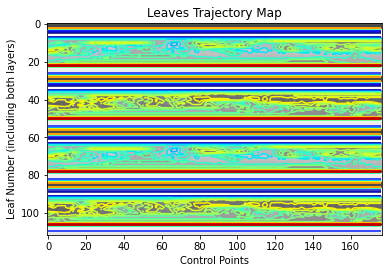

In [72]:
print('dataset shape', b.shape)
plt.imshow(b[22], cmap='Greys')
plt.xlabel('Control Points')
plt.ylabel('Leaf Number (including both layers)')
plt.title('Leaves Trajectory Map')
plt.contour(b[22], 20,cmap='jet');

## RP --> MU delivery profile

In [13]:
l = sorted([f.path for f in os.scandir('dataset/prostate_2G') if f.is_dir()])                    #list_subfolders_with_paths
z = [os.listdir(l[i]) for i in range(len(l))]
rp = [[file for file in z[i] if file.startswith("RP")] for i in range(len(z))]              # list of rt-plan 

In [170]:
rp1 = [pydicom.dcmread(l[i]+'/'+rp[i][0]) for i in range(len(l))]                                               # retrieve the dicom-rt_plan files directories
a1 = [rp1[i].BeamSequence[0].ControlPointSequence for i in range(len(rp1))]                                                                
a2 = [rp1[i].BeamSequence[1].ControlPointSequence for i in range(len(rp1))]
rp11 = [(a1[i] if a1[i][0].GantryRotationDirection == 'CW' else a2[i]) for i in range(len(a1))]                  # Beam 1 -->> CW 
rp12 = [(a1[i] if a1[i][0].GantryRotationDirection == 'CC' else a2[i] ) for i in range(len(a1))]                 # Beam 2 -->> CCW
# Beam 1
rp111 = [np.array([rp11[j][i].ReferencedDoseReferenceSequence[0].CumulativeDoseReferenceCoefficient for i in range(1,len(rp11[j]))]) for j in range(len(rp11))]   # Monitor Units relative rate from Beam 1
q1 = np.array([np.array([abs(rp111[j][i]-rp111[j][i+1]) for i in range(len(rp111[j])-1)]) for j in range(len(rp111))])                                             # Calculating the MU increment per cp
# Beam 2
rp112 = [np.array([rp12[j][i].ReferencedDoseReferenceSequence[0].CumulativeDoseReferenceCoefficient for i in range(1,len(rp12[j]))]) for j in range(len(rp12))]   # Monitor Units relative rate from Beam 1
q2 = np.array([np.array([abs(rp112[j][i]-rp112[j][i+1]) for i in range(len(rp112[j])-1)]) for j in range(len(rp112))])                                             # Calculating the MU increment per cp 

In [14]:
###---------------- For TB-----
rp1 = [pydicom.dcmread(l[i]+'/'+rp[i][0]) for i in range(len(l))]                                               # retrieve the dicom-rt_plan files directories
a1 = [rp1[i].BeamSequence[0].ControlPointSequence for i in range(len(rp1))] 
#a2 = [rp1[i].BeamSequence[1].ControlPointSequence for i in range(len(rp1))]  
rp11 = [a1[i] for i in range(len(a1))]                                                              
#rp11 = [(a1[i] if a1[i][0].GantryRotationDirection == 'CW' else a2[i]) for i in range(len(a1))] 
rp111 = [np.array([rp11[j][i].ReferencedDoseReferenceSequence[0].CumulativeDoseReferenceCoefficient for i in range(1,len(rp11[j]))]) for j in range(len(rp11))] 
q1 = np.array([np.array([abs(rp111[j][i]-rp111[j][i+1]) for i in range(len(rp111[j])-1)]) for j in range(len(rp111))])

In [81]:
q1.shape

(77, 176)

In [52]:
#[q1[i].shape if q1[i].shape == q1[0].shape else i for i in range(len(q1))]

In [51]:
# Since Plan 37 have more arcs, it was necessary extract mannyally that data and insert it in the models
pp1 = pydicom.dcmread(l[36]+'/'+rp[36][0])  
a37_1 = pp1.BeamSequence[1].ControlPointSequence 
a37_2 = pp1.BeamSequence[2].ControlPointSequence 
r1 = np.array([a37_1[i].ReferencedDoseReferenceSequence[0].CumulativeDoseReferenceCoefficient for i in range(1,len(a37_1))])
r1 = np.array([abs(r1[i]-r1[i+1]) for i in range(len(r1)-1)]) 
r2 = np.array([a37_2[i].ReferencedDoseReferenceSequence[0].CumulativeDoseReferenceCoefficient for i in range(1,len(a37_2))])
r2 = np.array([abs(r2[i]-r2[i+1]) for i in range(len(r2)-1)]) 
q1[36] = r1
q2[36] = r2
q1 = np.array([q1[i] for i in range(len(q1))])

In [171]:
# Stacked list of all beams
q = np.concatenate((q1,q2), axis=0)                                                                                                                                          

In [172]:
q.shape

(22, 176)

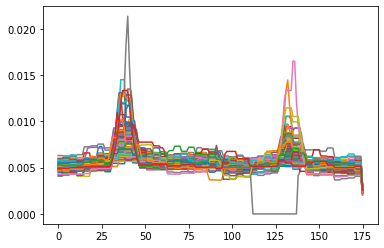

In [51]:
[plt.plot(q1[i]) for i in range(len(q1))];

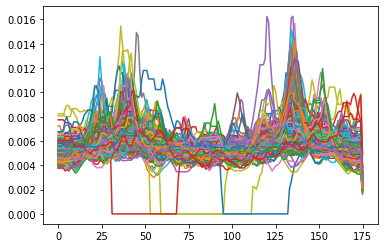

In [55]:
[plt.plot(q2[i]) for i in range(len(q2))];

In [65]:
len(q1[0])

176

In [83]:
r = np.radians(np.linspace(0, 360, 176))
theta = np.arange(2,354, 2)

In [84]:
r = np.radians(np.linspace(0, 360, 176))

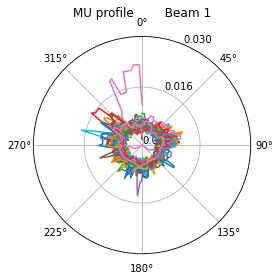

In [85]:
fig, ax  = plt.subplots(subplot_kw=dict(projection='polar'))
ax.set_title("MU profile        Beam 1", va='bottom')
for i in range(len(q1)): 
    ax.plot(r, q1[i])
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_rticks([0, 0.016, 0.030])
    ax.grid(True)

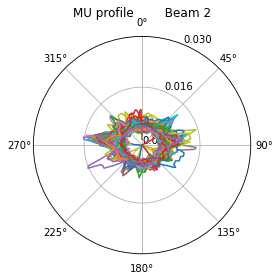

In [176]:
fig, ax  = plt.subplots(subplot_kw=dict(projection='polar'))
ax.set_title("MU profile        Beam 2", va='bottom')
for i in range(len(q1)): 
    ax.plot(r, q2[i])
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_rticks([0, 0.016, 0.030])
    ax.grid(True)

In [56]:
q.shape

(470, 176)

In [179]:
# when all plans have 2 arcs
#rp1 = [pydicom.dcmread(l[i]+'/'+rp[i][0]) for i in range(len(l))]                                               # retrieve the dicom-rt_plan files directories
#a1 = [rp1[i].BeamSequence[0].ControlPointSequence for i in range(len(rp1))]                                                                
#a2 = [rp1[i].BeamSequence[1].ControlPointSequence for i in range(len(rp1))]
#rp11 = [(a1[i] if a1[i][0].GantryRotationDirection == 'CW' else a2[i]) for i in range(len(a1))]                  # Beam 1 -->> CW 
#rp12 = [(a1[i] if a1[i][0].GantryRotationDirection == 'CC' else a2[i] ) for i in range(len(a1))]                 # Beam 2 -->> CCW
## Beam 1
#rp111 = [np.array([rp11[j][i].ReferencedDoseReferenceSequence[0].CumulativeDoseReferenceCoefficient for i in range(1,len(rp11[j]))]) for j in range(len(rp11))]   # Monitor Units relative rate from Beam 1
#q1 = np.array([np.array([abs(rp111[j][i]-rp111[j][i+1]) for i in range(len(rp111[j])-1)]) for j in range(len(rp111))])                                             # Calculating the MU increment per cp
## Beam 2
#rp112 = [np.array([rp12[j][i].ReferencedDoseReferenceSequence[0].CumulativeDoseReferenceCoefficient for i in range(1,len(rp12[j]))]) for j in range(len(rp12))]   # Monitor Units relative rate from Beam 1
## Stacked list of all beams
#q2 = np.array([np.array([abs(rp112[j][i]-rp112[j][i+1]) for i in range(len(rp112[j])-1)]) for j in range(len(rp112))])                                             # Calculating the MU increment per cp                     
#q = np.concatenate((q1,q2), axis=0)                                                                                                                                          

dataset shape (22, 176)


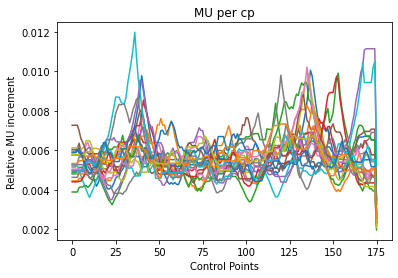

In [174]:
print('dataset shape', q.shape)
for i in range(len(q)):
    plt.plot(q[i])
plt.xlabel('Control Points')
plt.ylabel('Relative MU increment')
plt.title('MU per cp');

In [15]:
np.save('mu_2Gy_1arc_TB.npy', q1)

## RS -->  Structure set

In [2]:
l = sorted([f.path for f in os.scandir('dataset/untitled folder/') if f.is_dir()]) 
z = [os.listdir(l[i]) for i in range(len(l))] 
ct = [[file for file in z[i] if file.startswith("CT")] for i in range(len(z))]                                                            

In [3]:
l = sorted([f.path for f in os.scandir('dataset/untitled folder/') if f.is_dir()])                    #list_subfolders_with_paths
z = [os.listdir(l[i]) for i in range(len(l))]
rs = [[file for file in z[i] if file.startswith("RS")] for i in range(len(z))] 
s = [pydicom.dcmread(l[i]+'/'+rs[i][0]) for i in range(len(l))] 

In [4]:
ct1 = [[pydicom.dcmread(l[j]+'/'+ct[j][i]) for i in range (len(ct[j]))] for j in range(len(l))]                 # retrieve the files directories 
ct1 = [sorted(ct1[j], key=lambda s: s.SliceLocation) for j in range(len(ct1))] 

In [5]:
###--->>> CREATING THE MASK <<<---###
uids = [[ct1[j][i].SOPInstanceUID for i in range (len(ct1[j]))] for j in range(len(ct1))]
pixels = [np.array([(float(ct1[j][i].PixelSpacing[0]), float(ct1[j][i].PixelSpacing[1]))  for i in range(len(ct1[j]))]) for j in range(len(ct1))]
origins = [np.array([ct1[j][i].ImagePositionPatient for i in range(len(ct1[j]))]) for j in range(len(ct1))] 
img_array = [np.zeros((len(ct1[i]), *ct1[i][0].pixel_array.shape) , dtype=np.int16) for i in range(len(ct1))]   ## Create arrays - load pixel data in at this point
## Very important to apply the rescale & intercept - pydicom doesn't do it by default
img_array = [[pydicom.pixel_data_handlers.apply_rescale(ct1[j][i].pixel_array, ct1[j][i]) for i in range(len(ct1[j]))] for j in range(len(ct1))]
mask_array = [np.zeros_like(img_array[i], dtype=np.int8) for i in range(len(img_array))]                        ## Create an array for the masks, same shape as the image 

In [6]:
#([i if mask_array[i].shape == (88, 512, 512) else mask_array[i].shape for i in range(len(mask_array))])              

In [7]:
roi_seq_names = [[i.ROIName for i in list(s[j].StructureSetROISequence)] for j in range(len(s))]             ##----->>> List of structures from number of patient [10]
structure_names = roi_seq_names
#dummy = ['BODY', 'Bladder','Rectum', 'PTV48', 'PTV57.6', 'PTV60']
dummy = ['Bladder','Rectum', 'PTV48', 'PTV57.6', 'PTV60']
structures = [[dummy[i] if dummy[i] in list(structure_names[j]) else None for i in range(len(dummy))] for j in range(len(structure_names))]

In [10]:
#To check that all inputs have the same number of structures == 6
#structure_id = [[structure_names[j].index(structures[j][i]) + 1 for i in range(len(structures[0]))] for j in range(len(structure_names))]
#[True if len(structure_id[i]) == 6 else structure_id[i] for i in range(len(structure_id))] 

In [8]:
f = 0
for st in range(len(structures[f])):
    structure_id = structure_names[f].index(structures[f][st]) + 1       ##----->>> structure [st] at folder [f]
    rtv = s[f].ROIContourSequence[roi_seq_names[f].index(structures[f][st])] 
    contours = [contour for contour in rtv.ContourSequence]
    for c in contours:
        refd_UID = c.ContourImageSequence[0].ReferencedSOPInstanceUID
        loc_index = uids[f].index(refd_UID)                 ##----->>> Number of patient [10]
        x_pixel, y_pixel = pixels[f][loc_index]             ##----->>> Number of patient [10] 
        x_origin, y_origin, _ = origins[f][loc_index]       ##----->>> Number of patient [10]
        contour_coord = c.ContourData

        # x, y, z coordinates of the contour in mm
        x0 = contour_coord[len(contour_coord)-3]
        y0 = contour_coord[len(contour_coord)-2]
        z0 = contour_coord[len(contour_coord)-1]
        coord = []
        for i in range(0, len(contour_coord), 3):
            x = contour_coord[i]
            y = contour_coord[i+1]
            z = contour_coord[i+2]
            l = np.sqrt((x-x0)*(x-x0) + (y-y0)*(y-y0) + (z-z0)*(z-z0))
            l = np.ceil(l*2)+1
            for j in np.arange(1, l+1):
                coord.append([(x-x0)*j/l+x0, (y-y0)*j/l+y0, (z-z0)*j/l+z0])
            x0 = x
            y0 = y
            z0 = z

        # y, x is how it's mapped
        pixel_coords = [(np.round((y - y_origin) / y_pixel), np.round((x - x_origin) / x_pixel)) for x, y, _ in coord]

        rows = []
        cols = []
        for i,j in list(set(pixel_coords)):
            rows.append(i)
            cols.append(j)
        contour_arr = csc_matrix((np.ones_like(rows), (rows, cols)), dtype=np.int8, shape=(img_array[f][0].shape[0], img_array[f][0].shape[1])).toarray()
        #filled_arr = scn.binary_fill_holes(contour_arr)
        mask_array[f][loc_index,...] += contour_arr  * structure_id
    mask_array[f][mask_array[f] > 80] = 0
    
mask_array = np.array([np.array(mask_array[i][:88]) for i in range(len(mask_array))])    
#w = np.array([np.array([mask_array[j][i]/(mask_array[j][i].max()) for i in range(len(mask_array[7]))]) for j in range(len(mask_array))]) # Contour normalized

In [9]:
mask_array.shape

(116, 88, 512, 512)

In [13]:
#w = np.array([mask_array[0][i]/(mask_array[0][i].max()) for i in range(len(mask_array[7]))])

In [10]:
(contour_arr).shape

(512, 512)

In [11]:
def dicom_animation(x):
    plt.imshow(mask_array[0][x], cmap='jet', alpha=1)
    return x

In [12]:
interact(dicom_animation, x=(0, len(mask_array[0])-1))

interactive(children=(IntSlider(value=43, description='x', max=87), Output()), _dom_classes=('widget-interact'…

<function __main__.dicom_animation(x)>

In [8]:
#structures[0] = ['BODY', 'Bladder', 'Rectum', 'PTV48', 'PTV57.6', 'PTV60']
for f in range(len(s)):
    
    for st in range(len(structures[f])):
        structure_id = structure_names[f].index(structures[f][st]) + 1       ##----->>> structure [st] at folder [f]
        rtv = s[f].ROIContourSequence[roi_seq_names[f].index(structures[f][st])] 
        contours = [contour for contour in rtv.ContourSequence]
        for c in contours:
            refd_UID = c.ContourImageSequence[0].ReferencedSOPInstanceUID
            loc_index = uids[f].index(refd_UID)                 ##----->>> Number of patient [10]
            x_pixel, y_pixel = pixels[f][loc_index]             ##----->>> Number of patient [10] 
            x_origin, y_origin, _ = origins[f][loc_index]       ##----->>> Number of patient [10]
            contour_coord = c.ContourData

            # x, y, z coordinates of the contour in mm
            x0 = contour_coord[len(contour_coord)-3]
            y0 = contour_coord[len(contour_coord)-2]
            z0 = contour_coord[len(contour_coord)-1]
            coord = []
            for i in range(0, len(contour_coord), 3):
                x = contour_coord[i]
                y = contour_coord[i+1]
                z = contour_coord[i+2]
                l = np.sqrt((x-x0)*(x-x0) + (y-y0)*(y-y0) + (z-z0)*(z-z0))
                l = np.ceil(l*2)+1
                for j in np.arange(1, l+1):
                    coord.append([(x-x0)*j/l+x0, (y-y0)*j/l+y0, (z-z0)*j/l+z0])
                x0 = x
                y0 = y
                z0 = z

            # y, x is how it's mapped
            pixel_coords = [(np.round((y - y_origin) / y_pixel), np.round((x - x_origin) / x_pixel)) for x, y, _ in coord]

            rows = []
            cols = []
            for i,j in list(set(pixel_coords)):
                rows.append(i)
                cols.append(j)
            contour_arr = csc_matrix((np.ones_like(rows), (rows, cols)), dtype=np.int8, shape=(img_array[f][0].shape[0], img_array[f][0].shape[1])).toarray()
            #filled_arr = scn.binary_fill_holes(contour_arr)
            mask_array[f][loc_index,...] += contour_arr  * structure_id
        mask_array[f][mask_array[f] > 50] = 0
mask_array = np.array([np.array(mask_array[i][:88]) for i in range(len(mask_array))])


In [ ]:
#w = np.array([np.array([mask_array[j][i]/(mask_array[j][i].max()) for i in range(len(mask_array[7]))]) for j in range(len(mask_array))]) # Contour normalized

In [9]:
mask_array.shape

(119, 88, 512, 512)

In [10]:
#np.save('str_2.npy', mask_array)

In [11]:
#cti = np.load('ct1.npy')
#mask_array = np.load('str_1.npy')

In [4]:
mask_array.shape

(116, 88, 512, 512)

In [3]:
cti.shape

(119, 88, 512, 512)

In [22]:
#plt.imshow(cti[0], cmap=plt.cm.bone ,alpha= 0.9)

In [8]:
def dicom_animation(x):
    plt.contour(mask_array[57][x], cmap='plasma', alpha=1)
    #plt.colorbar()
    plt.imshow(cti[57][x], cmap=plt.cm.bone ,alpha= 0.9)

    return x

interact(dicom_animation, x=(0, len(cti[7])-1))

interactive(children=(IntSlider(value=43, description='x', max=87), Output()), _dom_classes=('widget-interact'…

<function __main__.dicom_animation(x)>

In [4]:
str1= np.load('structure.npy')
#str2= np.load('str_2.npy')

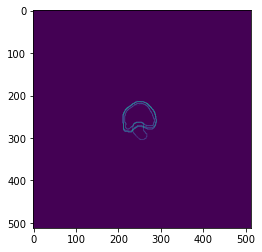

In [10]:
plt.imshow(str1[0][40])

In [11]:
def dicom_animation(x):
    plt.imshow(str1[0][x], cmap='jet', alpha=1)
    return x

In [12]:
interact(dicom_animation, x=(0, len(str1[7])-1))

interactive(children=(IntSlider(value=43, description='x', max=87), Output()), _dom_classes=('widget-interact'…

<function __main__.dicom_animation(x)>

In [3]:
structure = np.concatenate((str1,str2), axis=0) 

In [4]:
structure.shape

(235, 88, 512, 512)

In [5]:
np.save('structure.npy', structure)

In [2]:
structure = np.load('structure.npy')

In [3]:
structure.shape

(235, 88, 512, 512)

In [3]:
d1 = structure
res = [np.sum(d1[i], axis=0) for i in range(len(d1))]
res = [res[i]/res[i].max() for i in range(len(res))]
res[0].shape

(512, 512)

In [5]:
np.save('2d_str.npy', res)

In [4]:
def dicom_animation(x):
    plt.imshow(res[x], cmap='jet', alpha=1)    
    #plt.imshow(dose_array[x], cmap=plt.cm.bone ,alpha= 0.9)
    plt.clim(0, 1)
    plt.colorbar()
interact(dicom_animation, x=(0, len(res)-1))

interactive(children=(IntSlider(value=117, description='x', max=234), Output()), _dom_classes=('widget-interac…

<function __main__.dicom_animation(x)>

## RD -->> Dose distribution

In [16]:
l = sorted([f.path for f in os.scandir('dataset/prostate_2G') if f.is_dir()])                    #list_subfolders_with_paths
z = [os.listdir(l[i]) for i in range(len(l))]  
rd = [[file for file in z[i] if file.startswith("RD")] for i in range(len(z))]
d = [pydicom.dcmread(l[i]+'/'+rd[i][0]) for i in range(len(l))]
d = [d[i].pixel_array for i in range(len(d))]
d = [d[i]/d[i].max() for i in range(len(d))]

In [96]:
len(d)

77

In [213]:
#[d[i].shape if d[i].shape[0]<=88 else i for i in range(len(d))]

In [97]:
d[0].shape

(92, 103, 165)

In [223]:
#[d[i][:88].shape for i in range(len(d))]

In [98]:
d11 = [d[j][:88] for j in range(len(d))]

In [63]:
#plt.imshow(d[0])

In [18]:
#-->> Extract the min of each domension
#(np.array([d[i].shape[0] for i in range(len(d))])).min()
(np.array([d[i].shape[1] for i in range(len(d))])).min()
#(np.array([d[i].shape[2] for i in range(len(d))])).min()

77

In [19]:
q = []
for i in range( len(d)):
    n =(d[i].shape[1]-77)/2
    l =(d[i].shape[2]-127)/2

    a = d[i][:88,int(n):int(-n),int(l):int(-l)]
    for j in range(len(a)):
        if a[j].shape[0] == 77:
            a = a[:,:-1,:]
        elif a[j].shape[1] == 128:
            a = a[:,:,:-1]
        elif a[j].shape[1] == 129:
            a = a[:,:,:-2]
    q.append(a)
#d1= np.array(q)
#(np.array([q[i].shape[2] for i in range(len(q))]))
#(np.array([q[i].shape[1] for i in range(len(q))]))

In [20]:
q[0].shape

(88, 76, 127)

In [22]:
#[q[i].shape for i in range(len(q))]

In [23]:
res = [np.sum(q[i], axis=0) for i in range(len(q))]
#res = [res[i]/res[i].max() for i in range(len(res))]
res[0].shape

(76, 127)

In [228]:
def dicom_animation(x):
    plt.contour(res[x], cmap='jet', alpha=0.5)  
    return x

interact(dicom_animation, x=(0, len(res)-1))

interactive(children=(IntSlider(value=36, description='x', max=72), Output()), _dom_classes=('widget-interact'…

<function __main__.dicom_animation(x)>

In [ ]:
#np.save('dose.npy', d2)

In [262]:
norm = mpl.colors.Normalize(vmin=0, vmax=1)
def dicom_animation(x):
    plt.imshow(d1[x][30], cmap='jet', alpha=0.5)    
    #plt.imshow(dose_array[x], cmap=plt.cm.bone ,alpha= 0.9)
    plt.clim(0, 1)
    plt.colorbar()
    plt.contour(d1[x][30], cmap='jet', alpha=0.7)
    plt.clim(0, 1)
    #plt.colorbar()

    return x

interact(dicom_animation, x=(0, len(dose_array[0])-1))

interactive(children=(IntSlider(value=51, description='x', max=102), Output()), _dom_classes=('widget-interact…

<function __main__.dicom_animation(x)>

In [165]:
d2 = np.array([((d1[i]- np.mean(d1[i]))/(np.std(d1[i]))) for i in range(len(d1))])

In [177]:
d2.shape

(235, 88, 75, 127)

In [264]:
d1[0].shape

(88, 75, 127)

In [186]:
res = [np.sum(d1[i], axis=0) for i in range(len(d1))]
res = [res[i]/res[i].max() for i in range(len(res))]
res[0].shape

ValueError: zero-size array to reduction operation maximum which has no identity

In [283]:
def dicom_animation(x):
    plt.imshow(res[x], cmap='jet', alpha=1)    
    #plt.imshow(dose_array[x], cmap=plt.cm.bone ,alpha= 0.9)
    plt.clim(0, 1)
    plt.colorbar()
interact(dicom_animation, x=(0, len(dose_array[0])-1))

interactive(children=(IntSlider(value=51, description='x', max=102), Output()), _dom_classes=('widget-interact…

<function __main__.dicom_animation(x)>

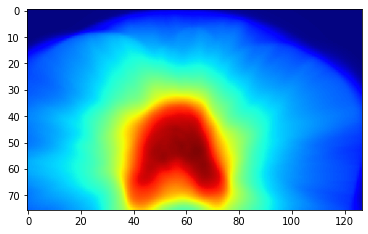

In [24]:
plt.imshow(res[0], cmap='jet', alpha=5) 

In [25]:
np.save('dose_2Gy_1arc_TB.npy', res)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
